<a href="https://colab.research.google.com/github/Sreyagavara/Machine-learning/blob/main/LWR9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

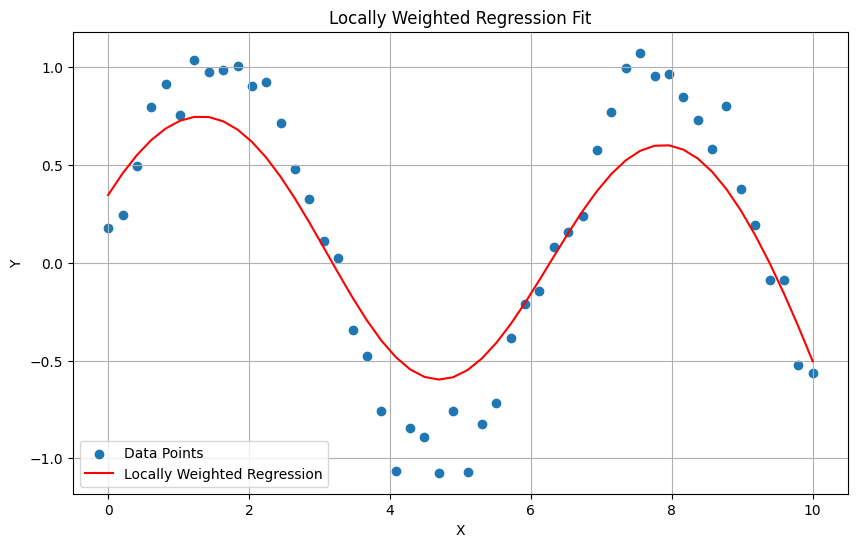

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)

# Locally Weighted Regression (LWR) Implementation
def locally_weighted_regression(x, y, query_point, tau=1.0):
    # Calculate weights
    weights = np.exp(-((x - query_point) ** 2) / (2 * tau ** 2))

    # Design matrix
    X = np.vstack((np.ones_like(x), x)).T

    # Weighted least squares
    W = np.diag(weights)
    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y

    # Prediction for the query point
    prediction = np.array([1, query_point]) @ theta
    return prediction

# Fit the model and make predictions
predictions = [locally_weighted_regression(x, y, query_point, tau=1.0) for query_point in x]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x, predictions, color='red', label='Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Regression Fit')
plt.legend()
plt.grid(True)
plt.show()
